In [67]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
severity_path_2 = '/w/246/gzk/PPMI/CSV_metadata/metadata_PD_2.csv'
severity_path_3 = '/w/246/gzk/PPMI/CSV_metadata/metadata_PD_3.csv'

In [4]:
df_2 = pd.read_csv(severity_path_2)
df_2.keys()

Index(['siteKey', 'researchGroup', 'subjectIdentifier', 'visitIdentifier',
       'studyIdentifier', 'seriesIdentifier', 'subjectSex', 'subjectAge',
       'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID', 'description',
       'Acquisition Type', 'Weighting', 'Pulse Sequence', 'Slice Thickness',
       'TE', 'TR', 'TI', 'Coil', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer', 'Mfg Model', 'Field Strength'],
      dtype='object')

In [5]:
df_3 = pd.read_csv(severity_path_3)
df_3.keys()

Index(['Unnamed: 0', 'siteKey', 'researchGroup', 'subjectIdentifier',
       'visitIdentifier', 'studyIdentifier', 'seriesIdentifier', 'subjectSex',
       'subjectAge', 'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID',
       'description', 'Acquisition.Type', 'Weighting', 'Pulse.Sequence',
       'Slice.Thickness', 'TE', 'TR', 'TI', 'Coil', 'Flip.Angle',
       'Acquisition.Plane', 'Matrix.X', 'Matrix.Y', 'Matrix.Z',
       'Pixel.Spacing.X', 'Pixel.Spacing.Y', 'Manufacturer', 'Mfg.Model',
       'Field.Strength', 'schwab'],
      dtype='object')

In [6]:
df_3['schwab'].unique()

array([ 90, 100,  95,  85,  80,  60,  70,  75,  65,  50,  40])

In [7]:
T1_df = df_3[df_3['Weighting'] == 'T1']

In [8]:
tmp = T1_df.groupby(['schwab']).size().reset_index(name='counts')

In [68]:
tmp

,schwab,counts
0,50,2
1,60,4
2,65,1
3,70,38
4,75,6
5,80,154
6,85,44
7,90,691
8,95,207
9,100,382


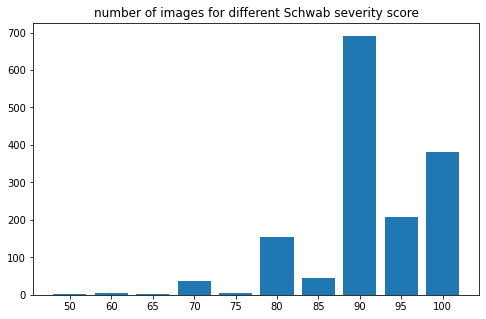

In [73]:
severity_score_count_dic = {}
for index, row in tmp.iterrows():
    severity_score_count_dic[str(row['schwab'])] = row['counts']

plt.figure(figsize = (8, 5))    
X_axis = np.arange(len(severity_score_count_dic.keys()))
plt.bar(severity_score_count_dic.keys(), severity_score_count_dic.values()) 
plt.xticks(X_axis, severity_score_count_dic.keys())
plt.title('number of images for different Schwab severity score')


# X_axis = np.arange(len(siteKey_lists))
# plt.figure(figsize = (15, 5)) 
# plt.bar(X_axis - 0.2, female_counts, 0.4, label = 'Female')
# plt.bar(X_axis + 0.2, male_counts, 0.4, label = 'Male')
  

# plt.xlabel("Groups")
# plt.ylabel("Number of Studies")
# plt.title("Counts")
# plt.legend()
plt.savefig('test.png', dpi=1000)
plt.show()

In [10]:
len(T1_df)

1529

In [11]:
tmp['schwab'].tolist()

[50, 60, 65, 70, 75, 80, 85, 90, 95, 100]

In [11]:
len(T1_df)

1529

In [12]:
#### severity clustring of 1) T1 fixed TETRTI, 2) T1 multiple TRTETI, 
#### complete the clustring
#### do the clustring based on the probability map, only the middle frame and combination of the 3 different tissues
#### do the classification based on the probability maps, if they are heavy, just couple of frames, for TETR ...

In [13]:
### برای دل خودمون می‌شه  یدونه سایت کلسیفیکیشن بر اساس همین دیتایی که دادن هم ران کنیم و ببینم اون چطوره مثلا :-؟

In [14]:
len(df_3['seriesIdentifier'].unique())

3180

In [12]:
path_included_df = pd.read_csv('T1_T2_path_of_step2_included.csv')

In [13]:
len(path_included_df)

1126

In [14]:
keep_seriesIdentifer_list = path_included_df['seriesIdentifier'].tolist()

In [15]:
len(keep_seriesIdentifer_list)

1126

In [16]:
df_3_filtered_series = df_3[df_3['seriesIdentifier'].isin(keep_seriesIdentifer_list)]
print(len(df_3_filtered_series), len(df_3_filtered_series['seriesIdentifier'].unique()))

1126 1126


In [17]:
testtest = df_3_filtered_series.groupby(['seriesIdentifier']).size().reset_index(name='counts')
testtest[testtest['counts'] > 1]

,seriesIdentifier,counts


In [21]:
df_3_filtered_series[df_3_filtered_series['seriesIdentifier'] == 1047640]

,Unnamed: 0,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,...,Acquisition.Plane,Matrix.X,Matrix.Y,Matrix.Z,Pixel.Spacing.X,Pixel.Spacing.Y,Manufacturer,Mfg.Model,Field.Strength,schwab


In [22]:
df_3_filtered_series.head()

,Unnamed: 0,siteKey,researchGroup,subjectIdentifier,visitIdentifier,studyIdentifier,seriesIdentifier,subjectSex,subjectAge,ageQualifier,...,Acquisition.Plane,Matrix.X,Matrix.Y,Matrix.Z,Pixel.Spacing.X,Pixel.Spacing.Y,Manufacturer,Mfg.Model,Field.Strength,schwab
0,1,34,PD,100001,Baseline,168485,1047642,M,67.38,Y,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,90
1,2,34,PD,100001,Baseline,168485,1047641,M,67.38,Y,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,90
19,20,34,PD,100017,Baseline,168594,1047945,F,58.75,Y,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,100
20,21,34,PD,100017,Baseline,168594,1047946,F,58.75,Y,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,100
41,42,73,PD,100018,Baseline,172488,1067285,F,69.73,Y,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Skyra,3.0,95


In [23]:
path_included_df.keys()

Index(['siteKey', 'researchGroup', 'subjectIdentifier', 'visitIdentifier',
       'studyIdentifier', 'seriesIdentifier', 'subjectSex', 'subjectAge',
       'ageQualifier', 'weightKg', 'dateAcquired', 'imageUID', 'description',
       'Acquisition Type', 'Weighting', 'Pulse Sequence', 'Slice Thickness',
       'TE', 'TR', 'TI', 'Coil', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer', 'Mfg Model', 'Field Strength', 'preprocessed_2_path',
       'mode'],
      dtype='object')

In [24]:
print(len(path_included_df),len(df_3_filtered_series))

1126 1126


In [18]:
merged_df = pd.merge(path_included_df, df_3_filtered_series, on="seriesIdentifier")
merged_df.head()
len(merged_df)

1126

In [28]:
merged_df.to_csv('T1_severity_score_info_csv.csv', index=False)

In [30]:
merged_df.keys()

Index(['siteKey_x', 'researchGroup_x', 'subjectIdentifier_x',
       'visitIdentifier_x', 'studyIdentifier_x', 'seriesIdentifier',
       'subjectSex_x', 'subjectAge_x', 'ageQualifier_x', 'weightKg_x',
       'dateAcquired_x', 'imageUID_x', 'description_x', 'Acquisition Type',
       'Weighting_x', 'Pulse Sequence', 'Slice Thickness', 'TE_x', 'TR_x',
       'TI_x', 'Coil_x', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer_x', 'Mfg Model', 'Field Strength', 'preprocessed_2_path',
       'mode', 'Unnamed: 0', 'siteKey_y', 'researchGroup_y',
       'subjectIdentifier_y', 'visitIdentifier_y', 'studyIdentifier_y',
       'subjectSex_y', 'subjectAge_y', 'ageQualifier_y', 'weightKg_y',
       'dateAcquired_y', 'imageUID_y', 'description_y', 'Acquisition.Type',
       'Weighting_y', 'Pulse.Sequence', 'Slice.Thickness', 'TE_y', 'TR_y',
       'TI_y', 'Coil_y', 'Flip.Angle', 'Acquisition.Plane', 'Matrix.X',


In [34]:
score_distribution = merged_df.groupby(['schwab', 'mode']).size().reset_index(name='counts')

In [35]:
score_distribution

,schwab,mode,counts
0,50,train,2
1,60,train,3
2,60,val,1
3,65,val,1
4,70,test,2
5,70,train,13
6,70,val,6
7,75,test,1
8,75,train,3
9,75,val,1


In [37]:
merged_df.keys()

Index(['siteKey_x', 'researchGroup_x', 'subjectIdentifier_x',
       'visitIdentifier_x', 'studyIdentifier_x', 'seriesIdentifier',
       'subjectSex_x', 'subjectAge_x', 'ageQualifier_x', 'weightKg_x',
       'dateAcquired_x', 'imageUID_x', 'description_x', 'Acquisition Type',
       'Weighting_x', 'Pulse Sequence', 'Slice Thickness', 'TE_x', 'TR_x',
       'TI_x', 'Coil_x', 'Flip Angle', 'Acquisition Plane', 'Matrix X',
       'Matrix Y', 'Matrix Z', 'Pixel Spacing X', 'Pixel Spacing Y',
       'Manufacturer_x', 'Mfg Model', 'Field Strength', 'preprocessed_2_path',
       'mode', 'Unnamed: 0', 'siteKey_y', 'researchGroup_y',
       'subjectIdentifier_y', 'visitIdentifier_y', 'studyIdentifier_y',
       'subjectSex_y', 'subjectAge_y', 'ageQualifier_y', 'weightKg_y',
       'dateAcquired_y', 'imageUID_y', 'description_y', 'Acquisition.Type',
       'Weighting_y', 'Pulse.Sequence', 'Slice.Thickness', 'TE_y', 'TR_y',
       'TI_y', 'Coil_y', 'Flip.Angle', 'Acquisition.Plane', 'Matrix.X',


In [80]:
len(merged_df['TI_x'].unique())

15

In [42]:
len(merged_df[merged_df['Weighting_x'] == 'T1'])

1047

In [ ]:
'Weighting_x', 'Pulse Sequence', 'TE_x', 'TR_x','TI_x', 'Manufacturer_x', 'Mfg Model', 

In [ ]:
weighting_mapping_dic = {'T1': [1, 0], 'T2':[0, 1]}
pulse_sequence_mapping_dic = {"SE/IR": [1, 0, 0, 0, 0, 0], 
                              "GR/GR/GR/GR/GR": [0, 1, 0, 0, 0, 0], 
                              'IR/IR/IR/IR/IR': [0, 0, 1, 0, 0, 0],
                              'GR/IR':[0, 0, 0, 1, 0, 0]
                              'GR': [0, 0, 0, 0, 1, 0]
                              'RM': [0, 0, 0, 0, 0, 1]
                              nan: [0, 0, 0, 0, 0, 0]
                             }


In [53]:
def create_mapping_label(data_list):
    mapping_dic = {}
    for i, item in enumerate(data_list):
        mapping_dic[item] = i
        
    return mapping_dic    

In [74]:
len(merged_df.groupby(['TE_x', 'TR_x','TI_x']).size().reset_index(name='counts'))

120

In [75]:
len(merged_df['pulse_sequence'].unique())

KeyError: 'pulse_sequence'

In [28]:
merged_df[merged_df['Weighting_x'] == 'T2']

,siteKey_x,researchGroup_x,subjectIdentifier_x,visitIdentifier_x,studyIdentifier_x,seriesIdentifier,subjectSex_x,subjectAge_x,ageQualifier_x,weightKg_x,...,Acquisition.Plane,Matrix.X,Matrix.Y,Matrix.Z,Pixel.Spacing.X,Pixel.Spacing.Y,Manufacturer_y,Mfg.Model,Field.Strength,schwab
0,34,PD,100001,Baseline,168485,1047642,M,67.38,Y,87.0,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,90
1,34,PD,100001,Baseline,168485,1047641,M,67.38,Y,87.0,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,90
2,34,PD,100017,Baseline,168594,1047945,F,58.75,Y,49.2,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,100
3,34,PD,100017,Baseline,168594,1047946,F,58.75,Y,49.2,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,100
4,73,PD,100018,Baseline,172488,1067285,F,69.73,Y,63.4,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Skyra,3.0,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,34,PD,74067,Month 24,171895,1064442,F,72.01,Y,56.6,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,90
1116,34,PD,75409,Month 24,171905,1064525,F,72.38,Y,47.4,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,95
1117,34,PD,75409,Month 24,171905,1064524,F,72.38,Y,47.4,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Verio,3.0,95
1119,73,PD,75480,Month 24,172582,1067813,M,58.58,Y,99.2,...,SAGITTAL,256,256,192,1.0,1.0,SIEMENS,Skyra,3.0,90


In [62]:
test

{'SE/IR': 0,
 'GR/GR/GR/GR/GR': 1,
 'IR/IR/IR/IR/IR': 2,
 'GR/IR': 3,
 'GR': 4,
 'RM': 5,
 nan: 6}

In [56]:
def create_one_hot_label(mapping_dic):
    mapping_oneHot_dic = {}
    k = len(mapping_dic)
    
    for item in mapping_dic:
        tmp = [0] * k 
        tmp[mapping_dic[item]] = 1
        mapping_oneHot_dic[item] = tmp
        
    return mapping_oneHot_dic

In [63]:
create_one_hot_label(test)

{'SE/IR': [1, 0, 0, 0, 0, 0, 0],
 'GR/GR/GR/GR/GR': [0, 1, 0, 0, 0, 0, 0],
 'IR/IR/IR/IR/IR': [0, 0, 1, 0, 0, 0, 0],
 'GR/IR': [0, 0, 0, 1, 0, 0, 0],
 'GR': [0, 0, 0, 0, 1, 0, 0],
 'RM': [0, 0, 0, 0, 0, 1, 0],
 nan: [0, 0, 0, 0, 0, 0, 1]}

In [55]:
k = 10
a = [0] * k
a

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]